In [1]:
import os, shutil
import time
import datetime
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import EarlyStopping
from keras import layers
from keras import models
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

'''
Emotions:
0 Angry
1 Disgust
2 Fear
3 Happy
4 Sad
5 Surprise
6 Neutral
'''

# First Model

In [2]:
#setting directory for images
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#image generator from train directory
train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=20,
        class_mode='categorical')

#test generator
test_generator = test_datagen.flow_from_directory(
        test_dir,
#         target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

#validation generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
#         target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [4]:
#creating neural network layers
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

In [10]:
t1 = time.time()

history = model.fit_generator(
                train_generator,
                steps_per_epoch=100,
                epochs=20,
                validation_data=validation_generator,
                validation_steps=50,
                use_multiprocessing=True,
                workers=-1
)

t2 = time.time()
print(t2-t1)


Epoch 1/20
100/100 [==============================] - 472s 5s/step - loss: 1.8103 - acc: 0.2605 - val_loss: 1.8248 - val_acc: 0.2620
Epoch 2/20
100/100 [==============================] - 500s 5s/step - loss: 1.8179 - acc: 0.2610 - val_loss: 1.8214 - val_acc: 0.2630
Epoch 3/20
100/100 [==============================] - 487s 5s/step - loss: 1.8036 - acc: 0.2630 - val_loss: 1.8330 - val_acc: 0.2210
Epoch 4/20
100/100 [==============================] - 495s 5s/step - loss: 1.8167 - acc: 0.2565 - val_loss: 1.8218 - val_acc: 0.2457
Epoch 5/20
100/100 [==============================] - 494s 5s/step - loss: 1.8259 - acc: 0.2460 - val_loss: 1.8179 - val_acc: 0.2560
Epoch 6/20
100/100 [==============================] - 489s 5s/step - loss: 1.8252 - acc: 0.2385 - val_loss: 1.8016 - val_acc: 0.2430
Epoch 7/20
100/100 [==============================] - 487s 5s/step - loss: 1.7972 - acc: 0.2675 - val_loss: 1.8370 - val_acc: 0.2265
Epoch 8/20
100/100 [==============================] - 486s 5s/step - 

#### best val_acc is 0.2639

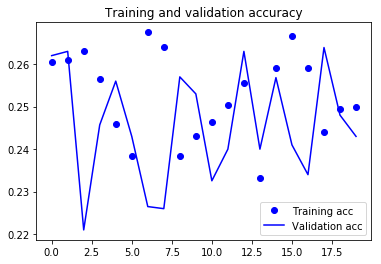

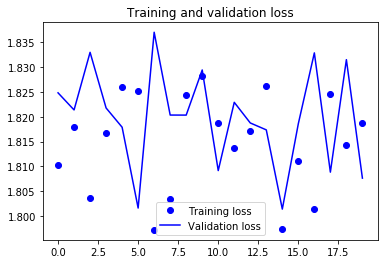

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation for Model 1

In [14]:
#Add data augmentation to the model setup and set the model to train; 
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
#       target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
#         target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [15]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [16]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/20
100/100 [==============================] - 40s 402ms/step - loss: 13.8678 - acc: 0.1391 - val_loss: 13.4687 - val_acc: 0.1644

Epoch 00001: val_acc improved from -inf to 0.16437, saving model to weights.best.hdf5
Epoch 2/20
100/100 [==============================] - 36s 363ms/step - loss: 13.8666 - acc: 0.1397 - val_loss: 14.0193 - val_acc: 0.1300

Epoch 00002: val_acc did not improve from 0.16437
Epoch 3/20
100/100 [==============================] - 37s 368ms/step - loss: 13.6651 - acc: 0.1522 - val_loss: 13.7716 - val_acc: 0.1456

Epoch 00003: val_acc did not improve from 0.16437
Epoch 4/20
100/100 [==============================] - 37s 367ms/step - loss: 12.0915 - acc: 0.2494 - val_loss: 12.2381 - val_acc: 0.2406

Epoch 00004: val_acc improved from 0.16437 to 0.24063, saving model to weights.best.hdf5
Epoch 5/20
100/100 [==============================] - 37s 371ms/step - loss: 11.9388 - acc: 0.2587 - val_loss: 12.1954 - val_acc: 0.2422

Epoch 00005: val_acc improved from 

### Model 1 Results:  
val_acc = 0.2639.  
val_acc with data augmentation = 0.2693

# Model 2

In [46]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
#         target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
#         target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [47]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))


model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))



In [48]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

In [33]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [34]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=100,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/100
50/50 [==============================] - 27s 546ms/step - loss: 1.9684 - acc: 0.2462 - val_loss: 1.8181 - val_acc: 0.2465

Epoch 00001: val_acc improved from -inf to 0.24654, saving model to weights.best.hdf5
Epoch 2/100
50/50 [==============================] - 25s 496ms/step - loss: 1.8116 - acc: 0.2558 - val_loss: 1.8272 - val_acc: 0.2443

Epoch 00002: val_acc did not improve from 0.24654
Epoch 3/100
50/50 [==============================] - 25s 495ms/step - loss: 1.8170 - acc: 0.2486 - val_loss: 1.8178 - val_acc: 0.2457

Epoch 00003: val_acc did not improve from 0.24654
Epoch 4/100
50/50 [==============================] - 25s 496ms/step - loss: 1.8127 - acc: 0.2538 - val_loss: 1.8189 - val_acc: 0.2457

Epoch 00004: val_acc did not improve from 0.24654
Epoch 5/100
50/50 [==============================] - 25s 495ms/step - loss: 1.8118 - acc: 0.2532 - val_loss: 1.8231 - val_acc: 0.2427

Epoch 00005: val_acc did not improve from 0.24654
Epoch 6/100
50/50 [====================

50/50 [==============================] - 25s 491ms/step - loss: 1.8148 - acc: 0.2458 - val_loss: 1.8147 - val_acc: 0.2417

Epoch 00088: val_acc did not improve from 0.25175
Epoch 89/100
50/50 [==============================] - 25s 491ms/step - loss: 1.8155 - acc: 0.2478 - val_loss: 1.8183 - val_acc: 0.2457

Epoch 00089: val_acc did not improve from 0.25175
Epoch 90/100
50/50 [==============================] - 25s 491ms/step - loss: 1.8137 - acc: 0.2508 - val_loss: 1.8119 - val_acc: 0.2477

Epoch 00090: val_acc did not improve from 0.25175
Epoch 91/100
50/50 [==============================] - 25s 491ms/step - loss: 1.8124 - acc: 0.2446 - val_loss: 1.8163 - val_acc: 0.2447

Epoch 00091: val_acc did not improve from 0.25175
Epoch 92/100
50/50 [==============================] - 25s 492ms/step - loss: 1.7982 - acc: 0.2628 - val_loss: 1.8175 - val_acc: 0.2439

Epoch 00092: val_acc did not improve from 0.25175
Epoch 93/100
50/50 [==============================] - 24s 485ms/step - loss: 1.8041

#### val_acc = 0.2517

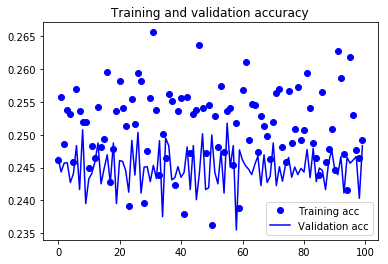

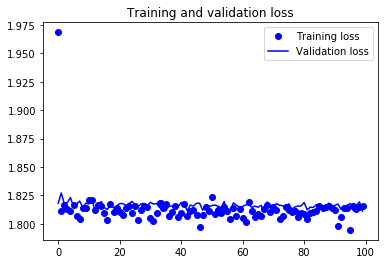

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Data Augmentation for Model 2

In [36]:
#Add data augmentation to the model setup and set the model to train; 
#See warnings above if you intend to run this block of code
train_datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
#         target_size=(150, 150),
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
#         target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')



Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [44]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
callbacks_list = [checkpoint, es]


In [40]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1000,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/1000
100/100 [==============================] - 38s 382ms/step - loss: 1.8139 - acc: 0.2422 - val_loss: 1.8169 - val_acc: 0.2425

Epoch 00001: val_acc did not improve from 0.24813
Epoch 2/1000
100/100 [==============================] - 37s 366ms/step - loss: 1.8040 - acc: 0.2556 - val_loss: 1.8200 - val_acc: 0.2308

Epoch 00002: val_acc did not improve from 0.24813
Epoch 3/1000
100/100 [==============================] - 37s 366ms/step - loss: 1.8020 - acc: 0.2544 - val_loss: 1.8196 - val_acc: 0.2531

Epoch 00003: val_acc improved from 0.24813 to 0.25312, saving model to weights.best.hdf5
Epoch 4/1000
100/100 [==============================] - 36s 361ms/step - loss: 1.8255 - acc: 0.2531 - val_loss: 1.8183 - val_acc: 0.2352

Epoch 00004: val_acc did not improve from 0.25312
Epoch 5/1000
100/100 [==============================] - 37s 365ms/step - loss: 1.8145 - acc: 0.2453 - val_loss: 1.8075 - val_acc: 0.2550

Epoch 00005: val_acc improved from 0.25312 to 0.25500, saving model to 

KeyboardInterrupt: 

#### val_acc = 0.2794

In [49]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
callbacks_list = [checkpoint, es]


In [50]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=1000,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/1000
100/100 [==============================] - 46s 462ms/step - loss: 1.9305 - acc: 0.2347 - val_loss: 1.8179 - val_acc: 0.2453

Epoch 00001: val_acc improved from -inf to 0.24534, saving model to weights.best.hdf5
Epoch 2/1000
100/100 [==============================] - 44s 436ms/step - loss: 1.8190 - acc: 0.2471 - val_loss: 1.8147 - val_acc: 0.2439

Epoch 00002: val_acc did not improve from 0.24534
Epoch 3/1000
100/100 [==============================] - 43s 433ms/step - loss: 1.8040 - acc: 0.2590 - val_loss: 1.8222 - val_acc: 0.2443

Epoch 00003: val_acc did not improve from 0.24534
Epoch 4/1000
100/100 [==============================] - 43s 434ms/step - loss: 1.8088 - acc: 0.2588 - val_loss: 1.8178 - val_acc: 0.2459

Epoch 00004: val_acc improved from 0.24534 to 0.24594, saving model to weights.best.hdf5
Epoch 5/1000
100/100 [==============================] - 43s 434ms/step - loss: 1.8189 - acc: 0.2431 - val_loss: 1.8177 - val_acc: 0.2421

Epoch 00005: val_acc did not improv

100/100 [==============================] - 43s 430ms/step - loss: 1.8067 - acc: 0.2583 - val_loss: 1.8142 - val_acc: 0.2419

Epoch 00086: val_acc did not improve from 0.25256
Epoch 87/1000
100/100 [==============================] - 43s 427ms/step - loss: 1.8150 - acc: 0.2440 - val_loss: 1.8176 - val_acc: 0.2463

Epoch 00087: val_acc did not improve from 0.25256
Epoch 88/1000
100/100 [==============================] - 43s 429ms/step - loss: 1.8070 - acc: 0.2534 - val_loss: 1.8205 - val_acc: 0.2425

Epoch 00088: val_acc did not improve from 0.25256
Epoch 89/1000
100/100 [==============================] - 43s 429ms/step - loss: 1.8108 - acc: 0.2476 - val_loss: 1.8133 - val_acc: 0.2461

Epoch 00089: val_acc did not improve from 0.25256
Epoch 90/1000
100/100 [==============================] - 43s 426ms/step - loss: 1.8091 - acc: 0.2587 - val_loss: 1.8148 - val_acc: 0.2455

Epoch 00090: val_acc did not improve from 0.25256
Epoch 91/1000
100/100 [==============================] - 43s 430ms/st

100/100 [==============================] - 43s 430ms/step - loss: 1.8166 - acc: 0.2468 - val_loss: 1.8108 - val_acc: 0.2512

Epoch 00172: val_acc did not improve from 0.25256
Epoch 173/1000
100/100 [==============================] - 43s 426ms/step - loss: 1.8090 - acc: 0.2535 - val_loss: 1.8154 - val_acc: 0.2443

Epoch 00173: val_acc did not improve from 0.25256
Epoch 174/1000
100/100 [==============================] - 43s 429ms/step - loss: 1.8110 - acc: 0.2525 - val_loss: 1.8107 - val_acc: 0.2499

Epoch 00174: val_acc did not improve from 0.25256
Epoch 175/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8079 - acc: 0.2502 - val_loss: 1.8204 - val_acc: 0.2397

Epoch 00175: val_acc did not improve from 0.25256
Epoch 176/1000
100/100 [==============================] - 43s 427ms/step - loss: 1.8116 - acc: 0.2501 - val_loss: 1.8154 - val_acc: 0.2425

Epoch 00176: val_acc did not improve from 0.25256
Epoch 177/1000
100/100 [==============================] - 43s 430

100/100 [==============================] - 43s 430ms/step - loss: 1.8057 - acc: 0.2590 - val_loss: 1.8199 - val_acc: 0.2457

Epoch 00258: val_acc did not improve from 0.25416
Epoch 259/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8112 - acc: 0.2462 - val_loss: 1.8130 - val_acc: 0.2431

Epoch 00259: val_acc did not improve from 0.25416
Epoch 260/1000
100/100 [==============================] - 43s 426ms/step - loss: 1.8114 - acc: 0.2495 - val_loss: 1.8136 - val_acc: 0.2455

Epoch 00260: val_acc did not improve from 0.25416
Epoch 261/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8109 - acc: 0.2526 - val_loss: 1.8131 - val_acc: 0.2471

Epoch 00261: val_acc did not improve from 0.25416
Epoch 262/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8105 - acc: 0.2524 - val_loss: 1.8169 - val_acc: 0.2443

Epoch 00262: val_acc did not improve from 0.25416
Epoch 263/1000
100/100 [==============================] - 43s 426

100/100 [==============================] - 43s 430ms/step - loss: 1.8129 - acc: 0.2451 - val_loss: 1.8184 - val_acc: 0.2461

Epoch 00344: val_acc did not improve from 0.25476
Epoch 345/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8099 - acc: 0.2535 - val_loss: 1.8156 - val_acc: 0.2445

Epoch 00345: val_acc did not improve from 0.25476
Epoch 346/1000
100/100 [==============================] - 43s 426ms/step - loss: 1.8102 - acc: 0.2483 - val_loss: 1.8154 - val_acc: 0.2469

Epoch 00346: val_acc did not improve from 0.25476
Epoch 347/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8067 - acc: 0.2545 - val_loss: 1.8127 - val_acc: 0.2437

Epoch 00347: val_acc did not improve from 0.25476
Epoch 348/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8146 - acc: 0.2479 - val_loss: 1.8139 - val_acc: 0.2481

Epoch 00348: val_acc did not improve from 0.25476
Epoch 349/1000
100/100 [==============================] - 43s 426

100/100 [==============================] - 43s 426ms/step - loss: 1.8141 - acc: 0.2489 - val_loss: 1.8188 - val_acc: 0.2429

Epoch 00430: val_acc did not improve from 0.25476
Epoch 431/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8119 - acc: 0.2498 - val_loss: 1.8161 - val_acc: 0.2465

Epoch 00431: val_acc did not improve from 0.25476
Epoch 432/1000
100/100 [==============================] - 43s 427ms/step - loss: 1.8076 - acc: 0.2573 - val_loss: 1.8134 - val_acc: 0.2431

Epoch 00432: val_acc did not improve from 0.25476
Epoch 433/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8087 - acc: 0.2515 - val_loss: 1.8091 - val_acc: 0.2479

Epoch 00433: val_acc did not improve from 0.25476
Epoch 434/1000
100/100 [==============================] - 43s 430ms/step - loss: 1.8142 - acc: 0.2497 - val_loss: 1.8184 - val_acc: 0.2453

Epoch 00434: val_acc did not improve from 0.25476
Epoch 435/1000
100/100 [==============================] - 43s 427

#### val_acc .2547

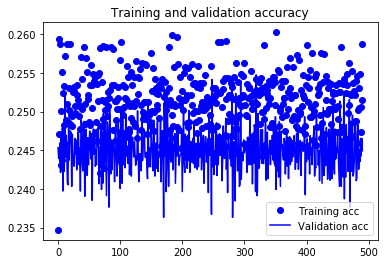

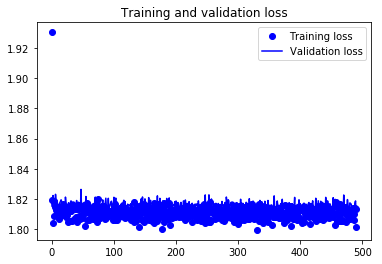

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline 

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 252, 252, 32)      9248      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 122, 122, 64)      36928     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 61, 61, 64)        0         
__________

In [61]:
model.save('25467.h5')

### Model 3 Results:
val_acc = 0.2517
val_acc with data augmentation = 0.2794

# Model 4 - dropping dropout

In [74]:
#Your code here; load the images; be sure to also preprocess these into tensors.
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# train_datagen = ImageDataGenerator()
# test_datagen = ImageDataGenerator()

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
#         target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
#         target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [71]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(256, 256, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))



In [72]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
callbacks_list = [checkpoint, es]


In [73]:
t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 527s 5s/step - loss: 1.8496 - acc: 0.2481 - val_loss: 1.8128 - val_acc: 0.2463

Epoch 00001: val_acc improved from -inf to 0.24634, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 509s 5s/step - loss: 1.8106 - acc: 0.2495 - val_loss: 1.8257 - val_acc: 0.2431

Epoch 00002: val_acc did not improve from 0.24634
Epoch 3/400
100/100 [==============================] - 501s 5s/step - loss: 1.8164 - acc: 0.2500 - val_loss: 1.8177 - val_acc: 0.2475

Epoch 00003: val_acc improved from 0.24634 to 0.24749, saving model to weights.best.hdf5
Epoch 4/400
100/100 [==============================] - 510s 5s/step - loss: 1.8070 - acc: 0.2521 - val_loss: 1.8200 - val_acc: 0.2427

Epoch 00004: val_acc did not improve from 0.24749
Epoch 5/400
100/100 [==============================] - 510s 5s/step - loss: 1.8120 - acc: 0.2523 - val_loss: 1.8129 - val_acc: 0.2455

Epoch 00005: val_acc did not improve from 0.24749


Epoch 44/400
100/100 [==============================] - 497s 5s/step - loss: 1.8085 - acc: 0.2562 - val_loss: 1.8148 - val_acc: 0.2447

Epoch 00044: val_acc did not improve from 0.25035
Epoch 45/400
100/100 [==============================] - 504s 5s/step - loss: 1.8116 - acc: 0.2472 - val_loss: 1.8184 - val_acc: 0.2425

Epoch 00045: val_acc did not improve from 0.25035
Epoch 46/400
100/100 [==============================] - 496s 5s/step - loss: 1.8104 - acc: 0.2495 - val_loss: 1.8138 - val_acc: 0.2467

Epoch 00046: val_acc did not improve from 0.25035
Epoch 47/400
100/100 [==============================] - 494s 5s/step - loss: 1.8159 - acc: 0.2426 - val_loss: 1.8164 - val_acc: 0.2451

Epoch 00047: val_acc did not improve from 0.25035
Epoch 48/400
100/100 [==============================] - 498s 5s/step - loss: 1.8095 - acc: 0.2546 - val_loss: 1.8163 - val_acc: 0.2437

Epoch 00048: val_acc did not improve from 0.25035
Epoch 49/400
100/100 [==============================] - 484s 5s/step -

KeyboardInterrupt: 

### Model 4 - dropping dropout Results:
epoch length jumped from 45s to 500s
val_acc = 0.2513

# Model 5 - new model who dis
batchnormalization, dropout, flatten

In [7]:
train_dir = 'fer2013/Training'
validation_dir = 'fer2013/Validation/'
test_dir = 'fer2013/Test'

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(150,150),
        batch_size=100,
        class_mode='categorical')


test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=100,
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [21]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(7, activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',
             optimizer='Adam',
              metrics=['acc']
             )

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=200)
callbacks_list = [checkpoint, es]


t1 = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=50)
t2 = time.time()
print(t2-t1)

Epoch 1/400
100/100 [==============================] - 44s 445ms/step - loss: 3.3671 - acc: 0.2009 - val_loss: 2.0394 - val_acc: 0.2305

Epoch 00001: val_acc improved from -inf to 0.23051, saving model to weights.best.hdf5
Epoch 2/400
100/100 [==============================] - 38s 376ms/step - loss: 1.8793 - acc: 0.2350 - val_loss: 1.7943 - val_acc: 0.2467

Epoch 00002: val_acc improved from 0.23051 to 0.24674, saving model to weights.best.hdf5
Epoch 3/400
100/100 [==============================] - 37s 373ms/step - loss: 1.8188 - acc: 0.2534 - val_loss: 1.7946 - val_acc: 0.2441

Epoch 00003: val_acc did not improve from 0.24674
Epoch 4/400
100/100 [==============================] - 37s 368ms/step - loss: 1.7822 - acc: 0.2609 - val_loss: 1.7462 - val_acc: 0.2860

Epoch 00004: val_acc improved from 0.24674 to 0.28603, saving model to weights.best.hdf5
Epoch 5/400
100/100 [==============================] - 37s 370ms/step - loss: 1.7468 - acc: 0.2814 - val_loss: 1.7047 - val_acc: 0.3176

E


Epoch 00082: val_acc did not improve from 0.64482
Epoch 83/400
100/100 [==============================] - 37s 372ms/step - loss: 0.4119 - acc: 0.8538 - val_loss: 1.3566 - val_acc: 0.6276

Epoch 00083: val_acc did not improve from 0.64482
Epoch 84/400
100/100 [==============================] - 37s 369ms/step - loss: 0.3909 - acc: 0.8600 - val_loss: 1.2571 - val_acc: 0.6382

Epoch 00084: val_acc did not improve from 0.64482
Epoch 85/400
100/100 [==============================] - 37s 374ms/step - loss: 0.3886 - acc: 0.8639 - val_loss: 1.2245 - val_acc: 0.6374

Epoch 00085: val_acc did not improve from 0.64482
Epoch 86/400
100/100 [==============================] - 38s 375ms/step - loss: 0.3861 - acc: 0.8627 - val_loss: 1.2865 - val_acc: 0.6302

Epoch 00086: val_acc did not improve from 0.64482
Epoch 87/400
100/100 [==============================] - 37s 370ms/step - loss: 0.3436 - acc: 0.8817 - val_loss: 1.3619 - val_acc: 0.6350

Epoch 00087: val_acc did not improve from 0.64482
Epoch 88/


Epoch 00125: val_acc did not improve from 0.66045
Epoch 126/400
100/100 [==============================] - 38s 379ms/step - loss: 0.2272 - acc: 0.9241 - val_loss: 1.4339 - val_acc: 0.6402

Epoch 00126: val_acc did not improve from 0.66045
Epoch 127/400
100/100 [==============================] - 37s 374ms/step - loss: 0.2384 - acc: 0.9194 - val_loss: 1.3404 - val_acc: 0.6280

Epoch 00127: val_acc did not improve from 0.66045
Epoch 128/400
100/100 [==============================] - 38s 376ms/step - loss: 0.2179 - acc: 0.9279 - val_loss: 1.4913 - val_acc: 0.6364

Epoch 00128: val_acc did not improve from 0.66045
Epoch 129/400
100/100 [==============================] - 38s 376ms/step - loss: 0.2198 - acc: 0.9275 - val_loss: 1.4126 - val_acc: 0.6501

Epoch 00129: val_acc did not improve from 0.66045
Epoch 130/400
100/100 [==============================] - 37s 374ms/step - loss: 0.1991 - acc: 0.9322 - val_loss: 1.4704 - val_acc: 0.6476

Epoch 00130: val_acc did not improve from 0.66045
Epoc

100/100 [==============================] - 37s 371ms/step - loss: 0.1551 - acc: 0.9493 - val_loss: 1.6901 - val_acc: 0.6432

Epoch 00169: val_acc did not improve from 0.66412
Epoch 170/400
100/100 [==============================] - 37s 367ms/step - loss: 0.1526 - acc: 0.9488 - val_loss: 1.5046 - val_acc: 0.6245

Epoch 00170: val_acc did not improve from 0.66412
Epoch 171/400
100/100 [==============================] - 37s 371ms/step - loss: 0.1437 - acc: 0.9522 - val_loss: 1.5860 - val_acc: 0.6546

Epoch 00171: val_acc did not improve from 0.66412
Epoch 172/400
100/100 [==============================] - 38s 376ms/step - loss: 0.1642 - acc: 0.9486 - val_loss: 1.5180 - val_acc: 0.6458

Epoch 00172: val_acc did not improve from 0.66412
Epoch 173/400
100/100 [==============================] - 37s 367ms/step - loss: 0.1451 - acc: 0.9536 - val_loss: 1.6475 - val_acc: 0.6368

Epoch 00173: val_acc did not improve from 0.66412
Epoch 174/400
100/100 [==============================] - 37s 370ms/st

#### val_acc = 0.6644

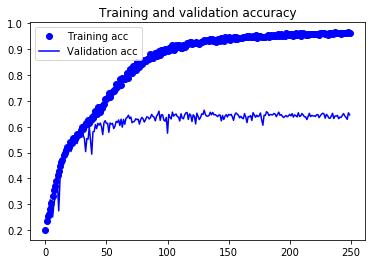

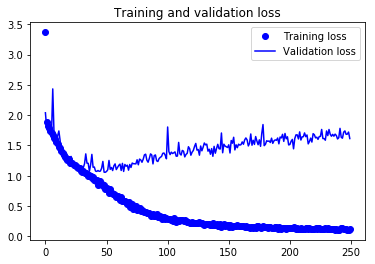

In [27]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()